In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

resolution_lk = 0.01
# n = 1000
# ls = np.linspace(0, 1, n)
# ks = np.linspace(0, 1, n)
ls = np.arange(0, 1, resolution_lk)
ks = np.arange(0, 1, resolution_lk)
[l, k] = np.meshgrid(ls,ks)

l = l.ravel().reshape(-1,1)
k = k.ravel().reshape(-1,1)


resolution_params = 0.5
a1 = np.arange(1, 10, resolution_params )
a2 = np.arange(1, 10, resolution_params )
b = np.arange(1, 10, resolution_params )
a1, a2, b = np.meshgrid(a1, a2, b)
a1 = a1.ravel().reshape(1,-1)
a2 = a2.ravel().reshape(1,-1)
b = b.ravel().reshape(1,-1)

def get_indices_of_equations_solvable_params(n, precision):   
    k1 = k**(4/(n-2))
    k2 = k**(n/(n-2))
    l1 = l**(4/(n-2))
    l2 = l**(n/(n-2))
        
    v1 = k1 
    v2 = k2
    v3 = k1/k2*l2
    v4 = l1/l2*k2
       
    eq1 = v1.dot(a1) + v3.dot(b) - 1
    eq2 = v2.dot(a2) + v4.dot(b) - 1
      
    abs_eq1 = np.absolute(eq1)
    abs_eq2 = np.absolute(eq2)
       
    bool_eq1 = abs_eq1 < precision
    bool_eq2 = abs_eq2 < precision
        
    r = bool_eq1 * bool_eq2
    
    vr = np.logical_or.reduce(r, axis=0)
    return np.where(vr)[0]



/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in less
/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in less


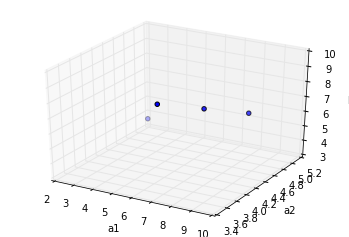

In [9]:
n = 3
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('a1')
ax.set_ylabel('a2')
ax.set_zlabel('b')

ids = get_indices_of_equations_solvable_params(n, 0.0001)
ax.scatter(a1[0][ids], a2[0][ids], b[0][ids], c='b', marker='o')
plt.show()